In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



random_state = 42
df = pd.read_csv('clean_data/merged.csv')

drop_cols = ['bear', 'correction', 'Regime']
df_clean = df.drop(drop_cols, axis=1)

# drop index
df_clean = df_clean.drop(df_clean.columns[0], axis=1)
df_clean.head()

,T10YFFM,T1YFFM,TB3SMFFM,TB3MS,T5YFFM,CEU2000000001,USCONS,DMANEMP,CES9091000001,CEU9091000001,...,case Shiller Home Price Index_3M_lag,case Shiller Home Price Index_6M_lag,case Shiller Home Price Index_9M_lag,case Shiller Home Price Index_12M_lag,case Shiller Home Price Index_18M_lag,Inflation Rate_3M_lag,Inflation Rate_6M_lag,Inflation Rate_9M_lag,Inflation Rate_12M_lag,Inflation Rate_18M_lag
0,1.22,0.00,-0.17,0.07,0.93,-189.0,33.0,50.0,-13.0,-333.0,...,0.0,0.00,0.00,0.00,0.00,0.37,0.00,-0.38,0.38,-0.76
1,1.36,0.28,-0.12,-0.05,1.09,-45.0,10.0,88.0,-2.0,3.0,...,0.0,0.00,0.00,0.00,0.00,-0.37,-0.37,0.00,0.38,0.38
2,1.33,0.24,-0.07,0.11,1.13,121.0,56.0,92.0,4.0,6.0,...,0.9,1.73,-0.07,0.07,0.02,0.37,0.37,-0.38,-0.38,0.00
3,1.32,0.32,0.16,0.31,1.12,193.0,36.0,93.0,4.0,6.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.37,0.00,-0.38,0.37
4,1.33,0.47,0.02,-0.14,1.13,183.0,32.0,102.0,4.0,5.0,...,0.0,0.00,0.00,0.00,0.00,0.00,-0.37,-0.37,0.00,-0.37


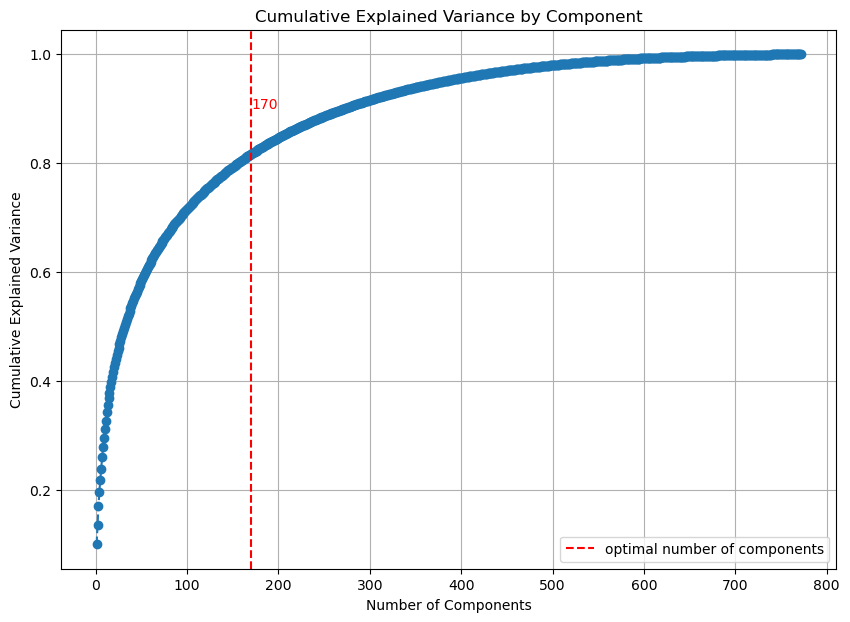

In [7]:
def scale_and_plot_pca(df):
    """
    Scale the data and plot the cumulative explained variance by component.

    Args:
    df (DataFrame): The DataFrame to process.

    Returns:
    ndarray: The scaled data.
    """

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    pca = PCA(random_state=random_state) # n_components not set yet
    pcs = pca.fit(scaled_data)

    cumulative_explained_variance = np.cumsum(pcs.explained_variance_ratio_)

    plt.figure(figsize=(10, 7))
    x_values = range(1, len(pcs.explained_variance_ratio_) + 1)
    y_values = cumulative_explained_variance
    plt.plot(x_values, y_values, marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance by Component')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    # plot red line at x=170
    plt.axvline(x=170, color='r', linestyle='--', label='optimal number of components')
    # label x=170
    plt.text(170, 0.9, '170', color='r')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return x_values, y_values

x_values, y_values = scale_and_plot_pca(df_clean)

# the optimal number is at the elbow of the curve

In [8]:
from sklearn.preprocessing import StandardScaler
X = df_clean.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA(n_components=170) # n_components set to optimal number

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled)

# print(pca.explained_variance_ratio_)


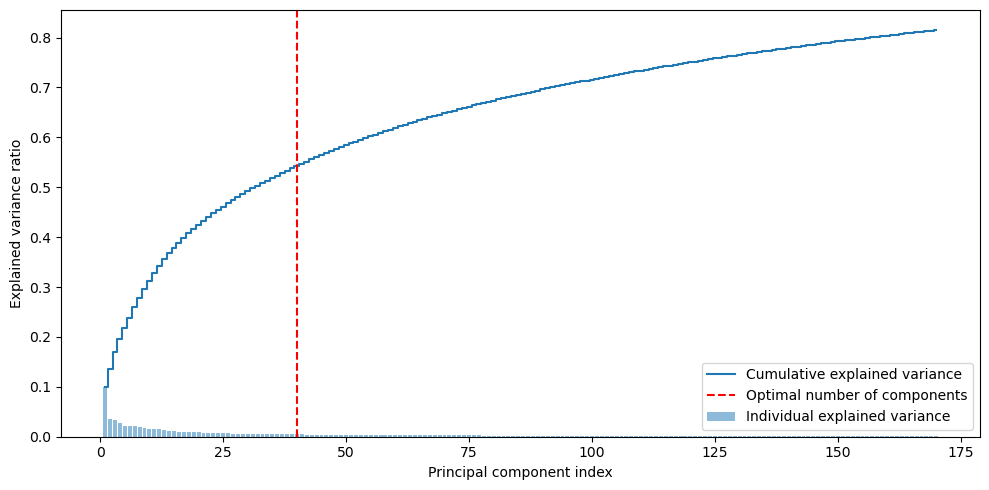

In [9]:
# Second cumulative explained variance based on the optimal number of components

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'pca' is your fitted PCA object
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))

# Plot the explained variance
plt.bar(range(1, 171), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
# Plot the cumulative explained variance
plt.step(range(1, 171), cumulative_explained_variance, where='mid', label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

#40 components here but the curve flattens out later towards 170
plt.axvline(x=40, color='r', linestyle='--', label='Optimal number of components')

plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [10]:
# n_components at 40? i don't think it's a good idea to reduce the number of components to 40 because the curve flattens out later towards 170